In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML, Image
from scipy.stats import ttest_ind_from_stats, spearmanr
from sklearn.preprocessing import StandardScaler
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter 
import tqdm
import math
import xarray as xr
%matplotlib inline


In [98]:
mean = [19, 0]
cov = np.array([[1, 19], [6, 6]]) 
cov = cov.T@cov

In [122]:
def softmax(matrix,m):
    
    exp_matrix = np.exp(matrix)
    
    summed_matrix = exp_matrix.sum(axis=1).reshape(m,1)
    a = np.tile(summed_matrix,(1,2))
    
    return exp_matrix/summed_matrix
    

In [124]:
m=10000
test = np.random.multivariate_normal(mean,cov,m)
softmax(test,m).mean(axis=0)

array([0.49519182, 0.50480818])

In [142]:
def mean_approx(mean,cov,m=1000):
    values = np.random.multivariate_normal(mean,cov,m)
    means = softmax(values,m).mean(axis=0)
    
    return means

In [134]:
points = np.arange(-100,100,1/2)
mu_1_track = np.zeros((len(points),len(points)))
mu_2_track = np.zeros((len(points),len(points)))

for i,mu_1 in enumerate(points):
    for j,mu_2 in enumerate(points):
        mean = np.array([mu_1,mu_2])
        approximation = mean_approx(mean)
        mu_1_track[i,j] = approximation[0]
        mu_2_track[i,j] = approximation[1]

<AxesSubplot:>

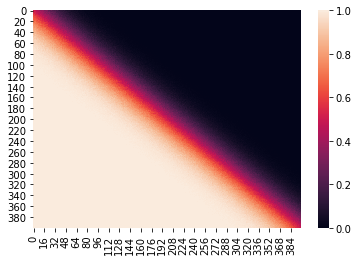

In [135]:
sns.heatmap(mu_1_track)

<AxesSubplot:>

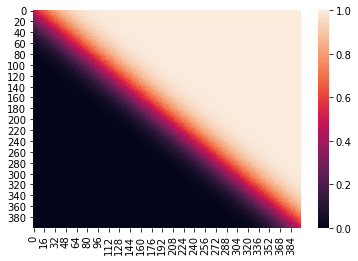

In [136]:
sns.heatmap(mu_2_track)

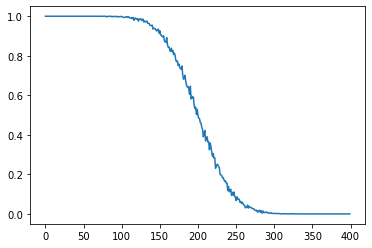

In [140]:
plt.plot(mu_2_track[:,200])

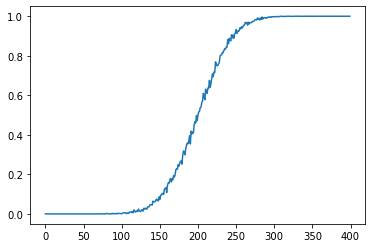

In [141]:
plt.plot(mu_1_track[:,200])

In [151]:
points = np.arange(0.5,10,1/10)
mu_1_track_var = np.zeros((len(points),len(points)))
mu_2_track_var = np.zeros((len(points),len(points)))


for i,sigma_1 in enumerate(points):
    for j,sigma_2 in enumerate(points):
        cov = np.array(([sigma_1,0],[0,sigma_2]))
        approximation = mean_approx(mean,cov,m=100000)
        mu_1_track_var[i,j] = approximation[0]
        mu_2_track_var[i,j] = approximation[1]

<AxesSubplot:>

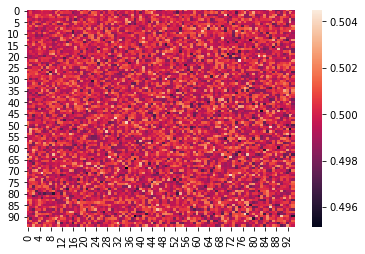

In [152]:
sns.heatmap(mu_1_track_var)

<AxesSubplot:>

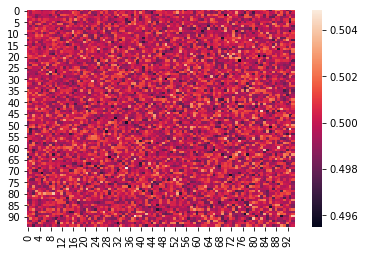

In [153]:
sns.heatmap(mu_2_track_var)

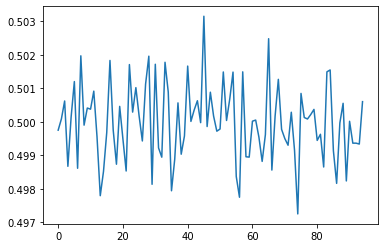

In [156]:
plt.plot(mu_2_track_var[:,50])